In [50]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import json

In [51]:
JSON_PATH = 'myData.json'

In [52]:
def load_data(json_path: str) -> tuple:
    """ loads dataset from json"""

    with open(json_path, 'r') as dataset:
        data_str = dataset.read()
    data = json.loads(data_str)
    return data['mapping'], data['mfcc'], data['labels']

In [53]:
def test_model(model, X: list, y: list) -> tuple[list, list, list]:
    """ Train and test of SVC model with K-Fold
    :return accuracy score on test and validation
    """

    kf = KFold(n_splits=10, shuffle=True)
    confusion_lst = []
    X = np.array(X)
    y= np.array(y)
    test_acc_lst = []
    valid_acc_lst = []
    iteration = 0
    for train_index, test_index in kf.split(X):

        # split data into train, test and validation
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)

        # train the model
        train_model = model
        train_model.fit(X_train, y_train)

        # predict values
        y_validation_pred = train_model.predict(X_validation)
        y_test_pred = train_model.predict(X_test)

        # calculate metrics
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        acc_validation = metrics.accuracy_score(y_validation, y_validation_pred)
        precision_test = metrics.precision_score(y_test, y_test_pred, average='micro')
        precision_validation = metrics.precision_score(y_validation, y_validation_pred, average='micro')


        # plot the confusion matrix for each iteration
        confusion_lst.append(confusion_matrix(y_test, y_test_pred))
        ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='gist_heat', display_labels=['Bass', 'Clap', 'Crash', 'HiHat', 'Kick', 'Snare'])
        plt.show()
        plt.savefig(f'confusion_matrix_{iteration + 1}.jpg')

        # save the classification report
        report = classification_report(y_test, y_test_pred, target_names=['Bass', 'Clap', 'Crash', 'HiHat', 'Kick', 'Snare'])

        test_acc_lst.append(acc_test)
        valid_acc_lst.append(acc_validation)
        iteration += 1

        #save metrics to file
        try:
            with open('log.txt', 'w') as file:
                file.write(f'{report} \n')
        except FileNotFoundError:
            print('File not found')

        # try:
        #     with open('log.txt', 'w') as file:
        #         file.write(f'Accuracy on test: {acc_test}, Accuracy on validation: {acc_validation} \n'
        #                    f'Precision on test: {precision_test}, Precision on validation: {precision_validation} \n')
        # except FileNotFoundError:
        #     print('File not found')
        # # print metrics
        # print(f'Accuracy on test: {acc_test}, Accuracy on validation: {acc_validation} \n'
        #       f'Precision on test: {precision_test}, Precision on validation: {precision_validation} \n')

    return test_acc_lst, valid_acc_lst, confusion_lst

In [54]:
def plot_metrics(test: list, validation: list):
    """ Plots the accuracy score on test and validation """
    x = range(1, len(test) + 1)
    acc_test = sum(test) / len(test)
    acc_valid = sum(validation) / len(validation)
    plt.plot(x, test, color='red', label='test (acc = %0.3f)' % acc_test)
    plt.plot(x, validation, color='green', label='validation (acc = %0.3f)' % acc_valid)
    plt.xlabel('Folds')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [55]:
_, inputs, targets = load_data(JSON_PATH)
model = svm.SVC(kernel='linear', C=2)

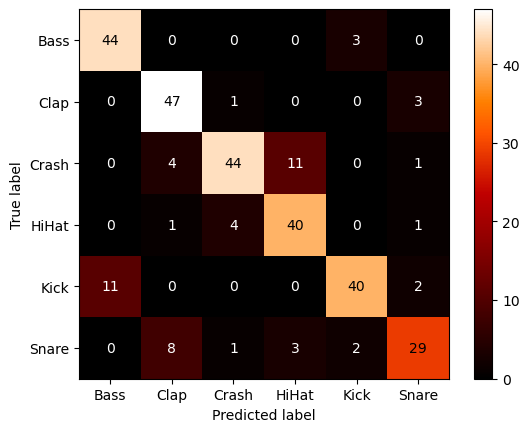

<Figure size 640x480 with 0 Axes>

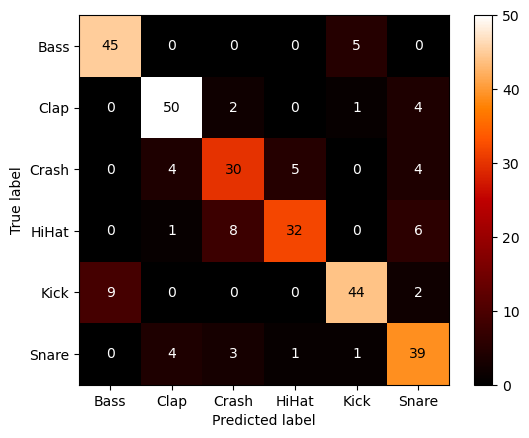

<Figure size 640x480 with 0 Axes>

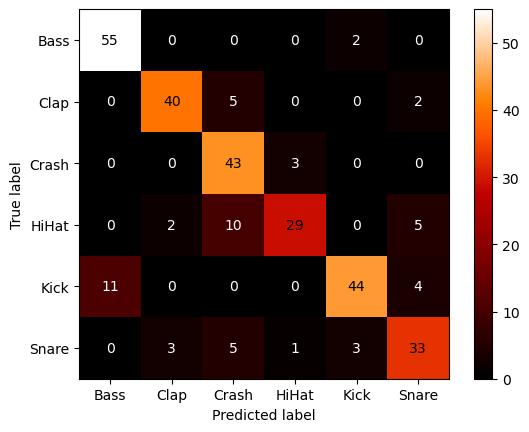

<Figure size 640x480 with 0 Axes>

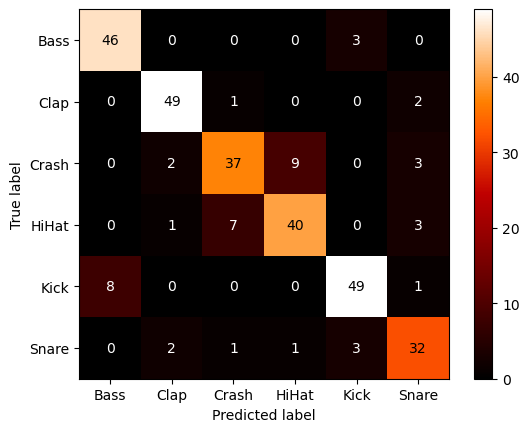

<Figure size 640x480 with 0 Axes>

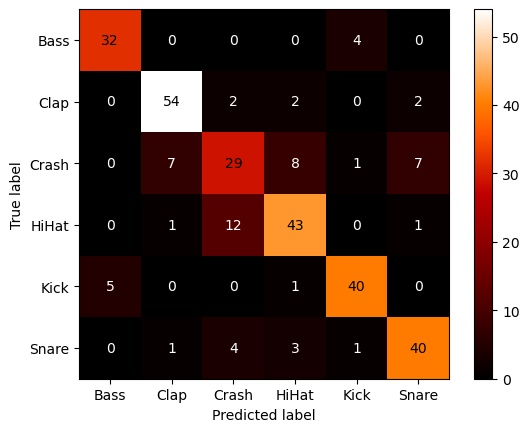

<Figure size 640x480 with 0 Axes>

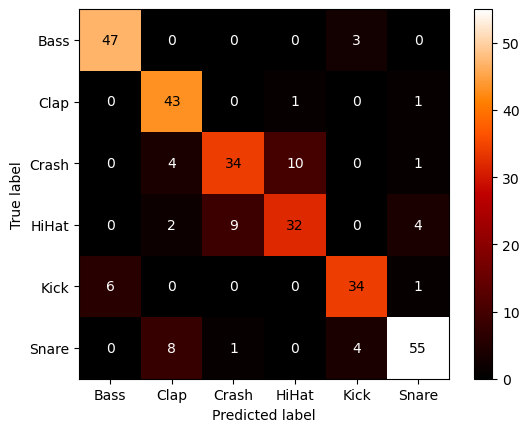

<Figure size 640x480 with 0 Axes>

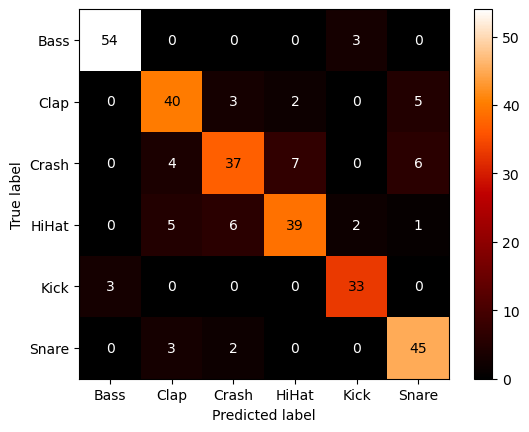

<Figure size 640x480 with 0 Axes>

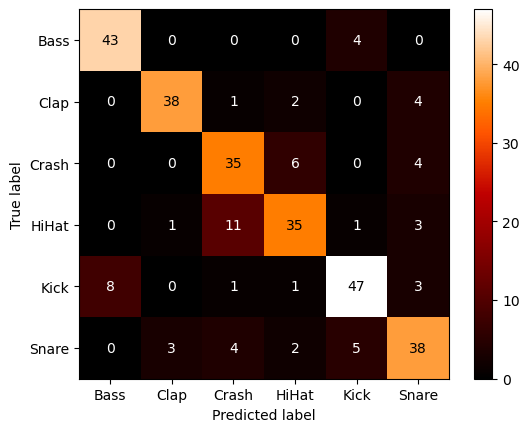

<Figure size 640x480 with 0 Axes>

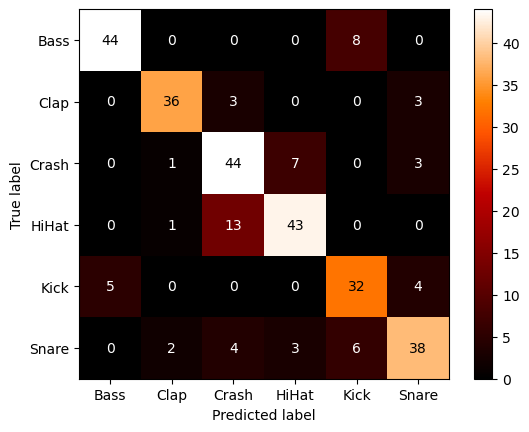

<Figure size 640x480 with 0 Axes>

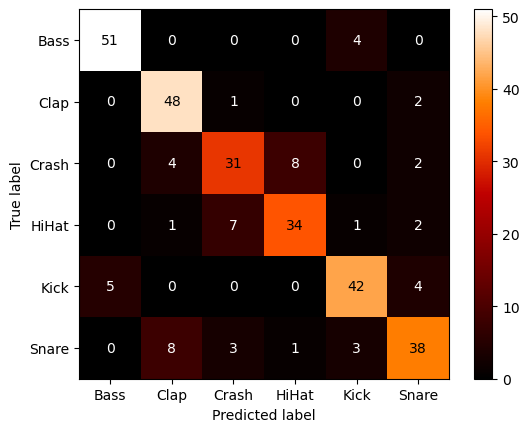

<Figure size 640x480 with 0 Axes>

In [56]:
test, validation, confusion_mat = test_model(model, inputs, targets)

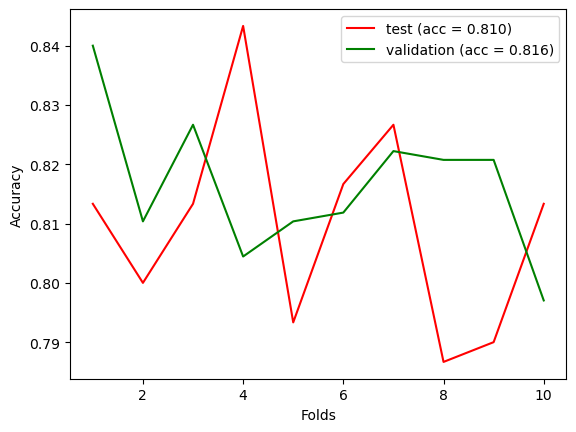

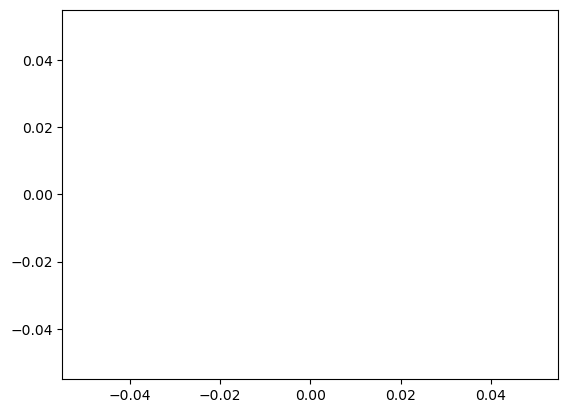

In [57]:
plot_metrics(test, validation)
ConfusionMatrixDisplay(np.sum(np.array(confusion_mat)), display_labels=['Bass', 'Clap', 'Crash', 'HiHat', 'Kick', 'Snare'])
plt.plot()
plt.savefig('Confusion matrix.png')